## Plotting Wells on a Map

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data from the CSV file
df = pd.read_csv('C:\\Users\\ihsankoo\\Downloads\\Liang_Cleaned.csv')


First, I'll plot the wells using their Surface X & Surface Y coordinates to visualize their spatial distribution. For this, scatter plot is go-to. Since I don't have a specific map of the region, a scatter plot will serve to show relative positions of the wells.

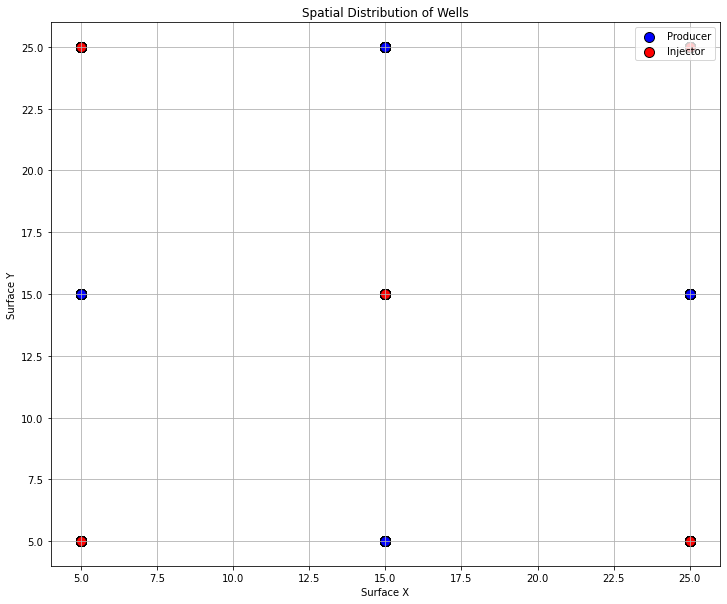

In [3]:
# Plotting the wells based on their Surface X & Surface Y coordinates
plt.figure(figsize=(12, 10))

# Differentiating between injector and producer wells using color
colors = df['Is Injector Well'].map({0: 'blue', 1: 'red'})
labels = df['Is Injector Well'].map({0: 'Producer', 1: 'Injector'})

# Scatter plot
for label, color in zip(['Producer', 'Injector'], ['blue', 'red']):
    mask = labels == label
    plt.scatter(df['Surface X'][mask], df['Surface Y'][mask], c=color, label=label, s=100, edgecolors='black')

plt.title('Spatial Distribution of Wells')
plt.xlabel('Surface X')
plt.ylabel('Surface Y')
plt.legend()
plt.grid(True)
plt.show()


The scatter plot above displays the spatial distribution of the wells:

Blue dots represent Producer wells.
Red dots represent Injector wells.
From the plot, we can observe that the wells are somewhat uniformly distributed. However, there are a couple of areas where multiple wells are close together, indicating potential clusters or regions of interest.

<hr>

Analyzing Spatial Patterns or Clusters
To analyze spatial patterns or clusters in production or injection rates, we can use a heatmap or contour plot. This will help visualize areas with high or low production/injection rates.

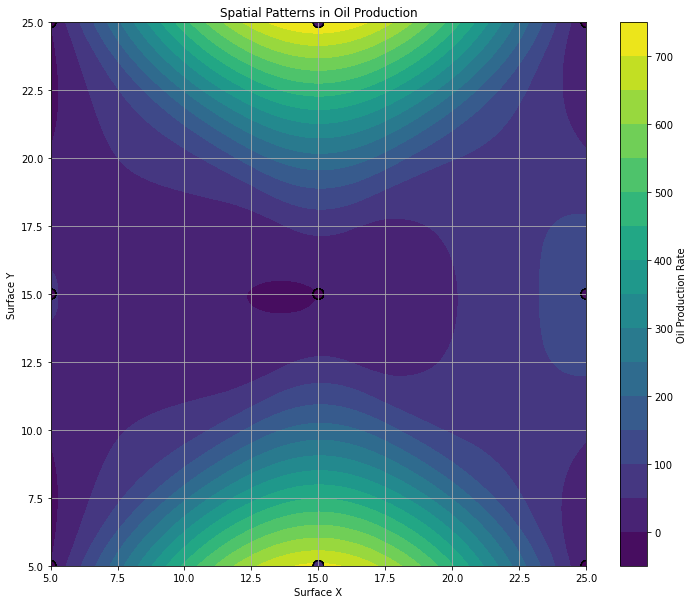

In [6]:
from scipy.interpolate import griddata

# Defining a grid of points for interpolation
xi = np.linspace(df['Surface X'].min(), df['Surface X'].max(), 500)
yi = np.linspace(df['Surface Y'].min(), df['Surface Y'].max(), 500)
xi, yi = np.meshgrid(xi, yi)

# Interpolating the oil production rate to the grid
zi = griddata((df['Surface X'], df['Surface Y']), df['Oil Production Rate'], (xi, yi), method='cubic')

# Plotting the spatial patterns in oil production
plt.figure(figsize=(12, 10))
plt.contourf(xi, yi, zi, 15, cmap="viridis")
plt.colorbar(label="Oil Production Rate")
plt.scatter(df['Surface X'], df['Surface Y'], c=df['Oil Production Rate'], s=100, edgecolors='black', cmap="viridis")
plt.title('Spatial Patterns in Oil Production')
plt.xlabel('Surface X')
plt.ylabel('Surface Y')
plt.grid(True)
plt.show()

<hr>

The contour plot above visualizes the spatial patterns in oil production:

From the plot, we can see regions of higher oil production and regions of lower production. This visualization can be useful for understanding the spatial distribution of reservoir productivity and identifying potential areas for future drilling or enhanced oil recovery methods.

<hr>

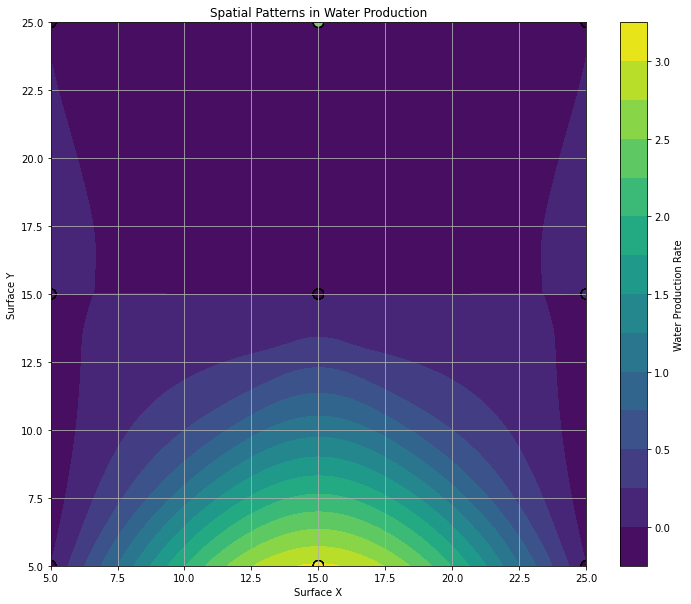

In [7]:
# Interpolating the water production rate to the grid
zi_water = griddata((df['Surface X'], df['Surface Y']), df['Water Production Rate'], (xi, yi), method='cubic')

# Plotting the spatial patterns in water production
plt.figure(figsize=(12, 10))
plt.contourf(xi, yi, zi_water, 15, cmap="viridis")
plt.colorbar(label="Water Production Rate")
plt.scatter(df['Surface X'], df['Surface Y'], c=df['Water Production Rate'], s=100, edgecolors='black', cmap="viridis")
plt.title('Spatial Patterns in Water Production')
plt.xlabel('Surface X')
plt.ylabel('Surface Y')
plt.grid(True)
plt.show()


<hr>

The contour plot above illustrates the spatial patterns in water production:

From this plot, we can discern regions with high water production and those with low water production. Understanding these spatial patterns can be crucial for reservoir management, especially in identifying areas of water breakthrough or potential waterflooding targets.

<hr>